### Tests on some Data-Sets

In [1]:
# Use some packages
import luxpy as lx
%matplotlib inline

from empir19nrm02 import _RES, _SPD
from empir19nrm02.f1prime import py_f1PrimeGlx
from empir19nrm02.tools import plotSelectedSPD, plotYxy, plotHist, plotCorrMatrixSmall

## Read some detector (RES) and SPD data (collection from CIES025)

In [2]:
CIES025_vldetectors = _RES['CIES025_VLDetectors']['S']['data'].copy()
CIES025_vldetectors_info = _RES['CIES025_VLDetectors']['S']['info'].copy()

print( 'CIES025_VLDetector size:', CIES025_vldetectors.shape)
print( 'CIES025_VLDetector Info size:', CIES025_vldetectors_info.shape)

CIES025_VLDetector size: (122, 81)
CIES025_VLDetector Info size: (121, 3)


Caculate the $f_{1}^{´}$ values and compare them with the reference data

In [3]:
f1pCIES025=lx.spectral_mismatch_and_uncertainty.f1prime(CIES025_vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)

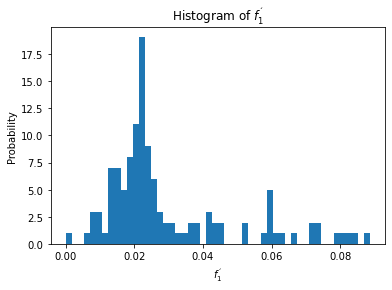

In [4]:
plotHist( f1pCIES025, xLabel='$f_{1}^{´}$', yLabel='Probability', title='Histogram of $f_{1}^{´}$', fileName='Histogram of CIES025 f1Prime.png')

#### Plot the Difference of the $f_{1}^{´}$ values calculated here (python implementation) as difference to the CIES025 reference values.
Attention: see the scale at the x-Axis, please.

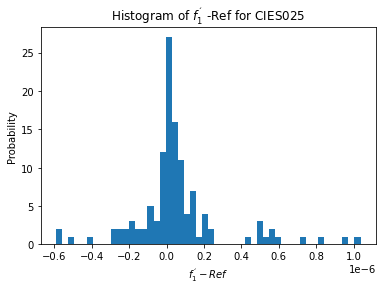

In [5]:
plotHist( f1pCIES025-CIES025_vldetectors_info[:,2], xLabel='$f_{1}^{´}-Ref$', yLabel='Probability', title='Histogram of $f_{1}^{´}$ -Ref for CIES025', fileName='Histogram of f1Prime-Ref_CIES025.png')


#### SPD RGB Data for white light from CIES025 with reference to duv calculations of Bp

In [6]:
SPD_CIES025_RGB = _SPD['CIES025_RGBLED']['S']['data'].copy()
print( 'CIES025 RBB White LED data:', SPD_CIES025_RGB.shape)
SPD_CIES025_RGB_Info = _SPD['CIES025_RGBLED']['S']['info'].copy()
print( 'CIES025 RBB White LED data:', SPD_CIES025_RGB_Info.shape)

CIES025 RBB White LED data: (98, 81)
CIES025 RBB White LED data: (97, 3)


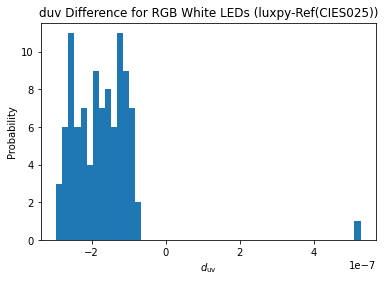

In [12]:
duv=lx.xyz_to_cct(lx.spd_to_xyz(SPD_CIES025_RGB), out='duv')
plotHist( duv[:,0]-SPD_CIES025_RGB_Info[:,2], xLabel='$d_{\mathrm{uv}}$', yLabel='Probability', title='duv Difference for RGB White LEDs (luxpy-Ref(CIES025))', fileName='SPD_CIES025_RGB_duvDiff.png')

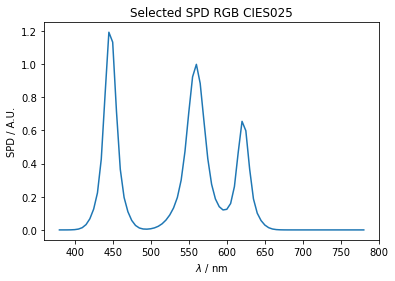

In [10]:
plotSelectedSPD( SPD_CIES025_RGB, int(SPD_CIES025_RGB.shape[1]/2), title='Selected SPD RGB CIES025', fileName='SPD_CIES025_RGB_Selected.png')